## Task 7:


## Stock Market Prediction using numerical and textual analysis


## Author: Anyanwu Justice


## GRIP: The Sparks Foundation


## Role: Data Science and Business Analytics intern


## Duration: April 2023 - May 2023

In [261]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import datetime as dt
import plotly.express as px
#sns.set()
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from textblob import TextBlob
import statsmodels.api as sm
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


In [262]:
# Loading the stock data
bsens= pd.read_csv(r'C:\Users\Ceejay\Downloads\Stock_data.csv')
bsens.head(10)

,Date,Close
0,1997-07-01 00:00:00+05:30,4300.859863
1,1997-07-02 00:00:00+05:30,4333.899902
2,1997-07-03 00:00:00+05:30,4323.459961
3,1997-07-04 00:00:00+05:30,4323.819824
4,1997-07-07 00:00:00+05:30,4291.450195
5,1997-07-08 00:00:00+05:30,4306.390137
6,1997-07-09 00:00:00+05:30,4404.689941
7,1997-07-10 00:00:00+05:30,4378.370117
8,1997-07-11 00:00:00+05:30,4321.979980
9,1997-07-14 00:00:00+05:30,4225.020020


In [263]:
# Getting to know our data
bsens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6382 entries, 0 to 6381
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6382 non-null   object 
 1   Close   6382 non-null   float64
dtypes: float64(1), object(1)
memory usage: 99.8+ KB


In [264]:
# Checking for missing values
bsens.isnull().sum()

Date     0
Close    0
dtype: int64

In [265]:
# Checking for duplicated values
bsens.duplicated().sum()

0

There are no missing values or duplicated values.

In [266]:
# Getting a summary statistics of the stock data
bsens.describe()

,Close
count,6382.000000
mean,20155.397148
std,16110.054101
min,2600.120117
25%,5142.639893
50%,17191.065430
75%,28502.360352
max,63284.191406


In [267]:
date_time= bsens['Date'].str.split(' ', expand= True)
date_time.rename({0: 'Date'}, axis= 1, inplace= True)

In [268]:
date_time

,Date,1
0,1997-07-01,00:00:00+05:30
1,1997-07-02,00:00:00+05:30
2,1997-07-03,00:00:00+05:30
3,1997-07-04,00:00:00+05:30
4,1997-07-07,00:00:00+05:30
...,...,...
6377,2023-05-22,00:00:00+05:30
6378,2023-05-23,00:00:00+05:30
6379,2023-05-24,00:00:00+05:30
6380,2023-05-25,00:00:00+05:30


In [269]:
bsens['Date']= date_time['Date']

In [270]:
# Converting the data type of the Date column to a datetime datatype
bsens['Date']= pd.to_datetime(bsens.Date, format='%Y-%m-%d')

In [271]:
# checking to see if theres a change in data type
bsens.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [272]:
bsens

,Date,Close
0,1997-07-01,4300.859863
1,1997-07-02,4333.899902
2,1997-07-03,4323.459961
3,1997-07-04,4323.819824
4,1997-07-07,4291.450195
...,...,...
6377,2023-05-22,61963.679688
6378,2023-05-23,61981.789062
6379,2023-05-24,61773.781250
6380,2023-05-25,61872.621094


In [273]:
# Creating a date time index from the Date column
bsens= bsens.set_index('Date')

In [274]:
bsens

,Close
Date,
1997-07-01,4300.859863
1997-07-02,4333.899902
1997-07-03,4323.459961
1997-07-04,4323.819824
1997-07-07,4291.450195
...,...
2023-05-22,61963.679688
2023-05-23,61981.789062
2023-05-24,61773.781250


In [275]:
# Loading the text dataset...
news_df= pd.read_csv(r'C:\Users\Ceejay\Downloads\india-news-headlines.csv')
news_df

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
3650965,20220331,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650966,20220331,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967,20220331,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650968,20220331,city.erode,Tamil Nadu sees marginal rise of Covid cases w...


In [276]:
# Getting to know our data
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 0 to 3650969
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 83.6+ MB


In [277]:
# Checking for missing values
news_df.isnull().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [278]:
# Checking for duplicated values
news_df.duplicated().sum()

24860

In [279]:
# Dropping duplicated values
news_df.drop_duplicates('publish_date', inplace= True, keep= 'last')

In [280]:
news_df

,publish_date,headline_category,headline_text
85,20010102,entertainment.hindi.bollywood,Raju Chacha
126,20010103,entertainment.hindi.bollywood,'Devdas': Jinxed?
279,20010104,entertainment.english.hollywood,Unbreakable
405,20010105,india,MP best in forest development: Centre
417,20010106,unknown,Australia; New Zealand urged to accept Indo-Fi...
...,...,...,...
3648971,20220327,city.cuttack,BJD rides Odisha CM Naveen Patnaik magic to sw...
3649471,20220328,city.goa,Third straight BJP govt in Goa as Team Sawant ...
3649971,20220329,entertainment.kannada.movies.news,Yash at KGF: Chapter 2 launch: The Indian film...
3650471,20220330,city.pune,Hotels ask Maharashtra CM Uddhav Thackeray for...


In [281]:
# Converting the publish_date column from an integer datatype to a datetimme datatype
dates= []
for i in news_df['publish_date'].astype('string'):
    a= dt.datetime.strptime(i, '%Y%m%d').strftime('%yyyy-%mm-%dd')
    dates.append(i)

In [282]:
news_df['publish_date']= dates

In [283]:
news_df['publish_date']= news_df['publish_date'].astype('datetime64[ns]')


In [284]:
news_df

,publish_date,headline_category,headline_text
85,2001-01-02,entertainment.hindi.bollywood,Raju Chacha
126,2001-01-03,entertainment.hindi.bollywood,'Devdas': Jinxed?
279,2001-01-04,entertainment.english.hollywood,Unbreakable
405,2001-01-05,india,MP best in forest development: Centre
417,2001-01-06,unknown,Australia; New Zealand urged to accept Indo-Fi...
...,...,...,...
3648971,2022-03-27,city.cuttack,BJD rides Odisha CM Naveen Patnaik magic to sw...
3649471,2022-03-28,city.goa,Third straight BJP govt in Goa as Team Sawant ...
3649971,2022-03-29,entertainment.kannada.movies.news,Yash at KGF: Chapter 2 launch: The Indian film...
3650471,2022-03-30,city.pune,Hotels ask Maharashtra CM Uddhav Thackeray for...


In [285]:
# checking to see if theres a change in data type
news_df.dtypes

publish_date         datetime64[ns]
headline_category            object
headline_text                object
dtype: object

In [286]:
# Creating a date time index from the publish_date column
news_df= news_df.set_index('publish_date')

In [287]:
news_df.tail(10)

,headline_category,headline_text
publish_date,,
2022-03-22,city.nagpur,Should we call RSS leaders janaab for their Mu...
2022-03-23,city.nashik,Pune: Two criminals arrested in Pashan hill ro...
2022-03-24,city.goa,I-League: Churchill Bros edge past Aizawl
2022-03-25,city.goa,In Houston; $5;000 reward for info on John Dia...
2022-03-26,city.kochi,Kerala University gets a balanced budget of Rs...
2022-03-27,city.cuttack,BJD rides Odisha CM Naveen Patnaik magic to sw...
2022-03-28,city.goa,Third straight BJP govt in Goa as Team Sawant ...
2022-03-29,entertainment.kannada.movies.news,Yash at KGF: Chapter 2 launch: The Indian film...
2022-03-30,city.pune,Hotels ask Maharashtra CM Uddhav Thackeray for...


In [288]:
# The news dataset begins from 2001-01-02 and ends at 2022-03-31, so we also make sure it aligns for the bsens dataset
bsens_df= bsens['2001-01-02':'2022-03-31']
bsens_df

,Close
Date,
2001-01-02,4018.879883
2001-01-03,4060.020020
2001-01-04,4115.370117
2001-01-05,4183.729980
2001-01-08,4120.430176
...,...
2022-03-25,57362.199219
2022-03-28,57593.488281
2022-03-29,57943.648438


<AxesSubplot:xlabel='Date'>

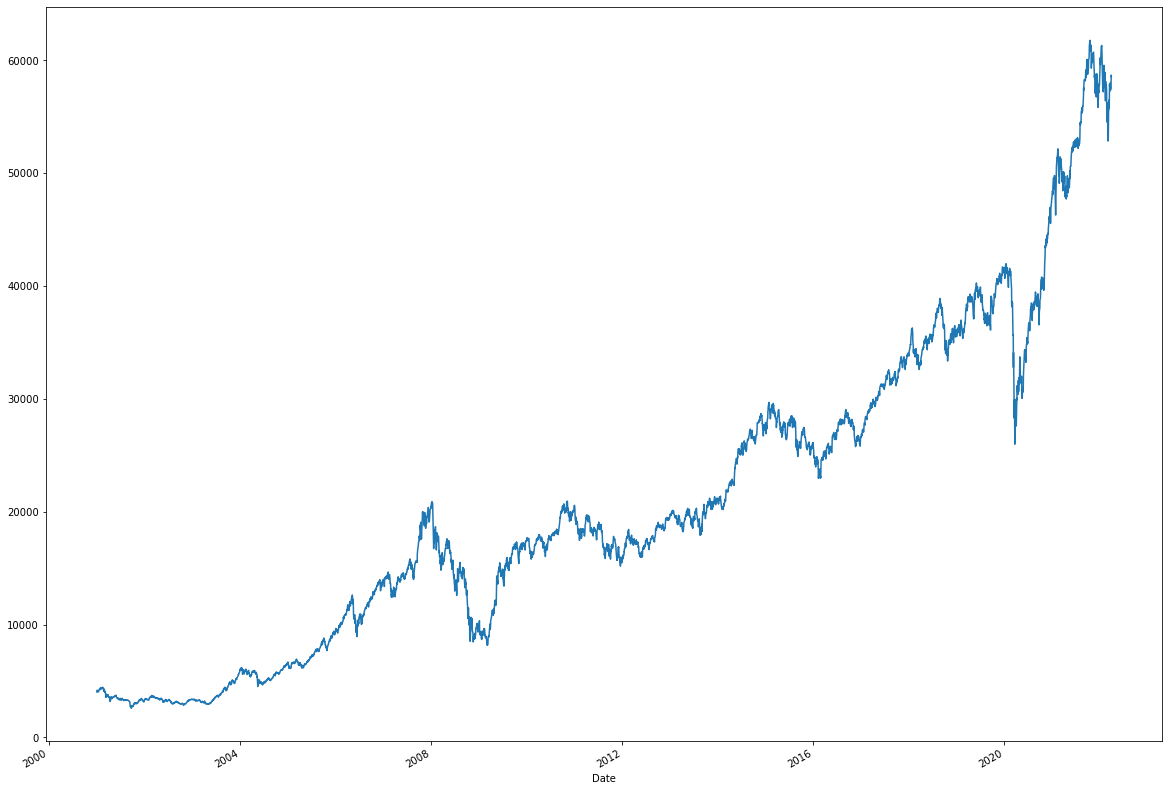

In [289]:
bsens_df['Close'].plot(figsize= (20,15))

In [290]:
bsens_df= bsens_df.asfreq('D', method= 'ffill')

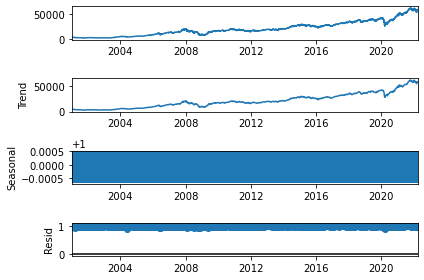

<Figure size 1440x1080 with 0 Axes>

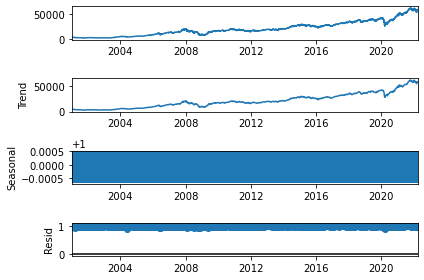

In [291]:
plt.figure(figsize= (20, 15))
decomposition= sm.tsa.seasonal_decompose(bsens_df, model= 'multiplicative', extrapolate_trend= 'freq')
decomposition.plot()

The above plot is a decomposition plot of the dataset. it can be seen that the data has a linear increasing trend.


Now we create our training and test sets, we will train our data on all of the dataset except the last 100. This will be used as the test set.

In [292]:
train= bsens_df[:-100]
test= bsens_df[-100:]

In [293]:
train

,Close
Date,
2001-01-02,4018.879883
2001-01-03,4060.020020
2001-01-04,4115.370117
2001-01-05,4183.729980
2001-01-06,4183.729980
...,...
2021-12-17,57011.738281
2021-12-18,57011.738281
2021-12-19,57011.738281


## Baseline Model


This will be a model to compare with our final hybrid model. For this, we would use the  ForecasterAutoreg class from the skforecast library. It is an autoregressive model i.e it uses previous value to predict current values. For our model, we will use the previous year's value to predict a current value. We will use the lasso regressor to nullify the effect of insignificant lags and predictors. Lasso helps to shrink unnecessary coefficients that might make the model overfit. It does this by assigning more weights to larger coefficients.


In [294]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
lass= Lasso()
forecaster= ForecasterAutoreg(regressor= lass, lags= 365)
forecaster.fit(y= train['Close'])

C:\Users\Ceejay\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.903e+08, tolerance: 1.235e+08
  model = cd_fast.enet_coordinate_descent(


In [295]:
#getting a summary of the model
forecaster

ForecasterAutoreg 
Regressor: Lasso() 
Lags: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 2

In [296]:
#making predictions
prediction= forecaster.predict(len(test))
prediction

2021-12-22    56208.635750
2021-12-23    56096.796933
2021-12-24    56048.352173
2021-12-25    56113.796047
2021-12-26    56086.803232
                  ...     
2022-03-27    58262.782886
2022-03-28    58394.821528
2022-03-29    58487.042916
2022-03-30    58535.589419
2022-03-31    58561.015692
Freq: D, Name: pred, Length: 100, dtype: float64

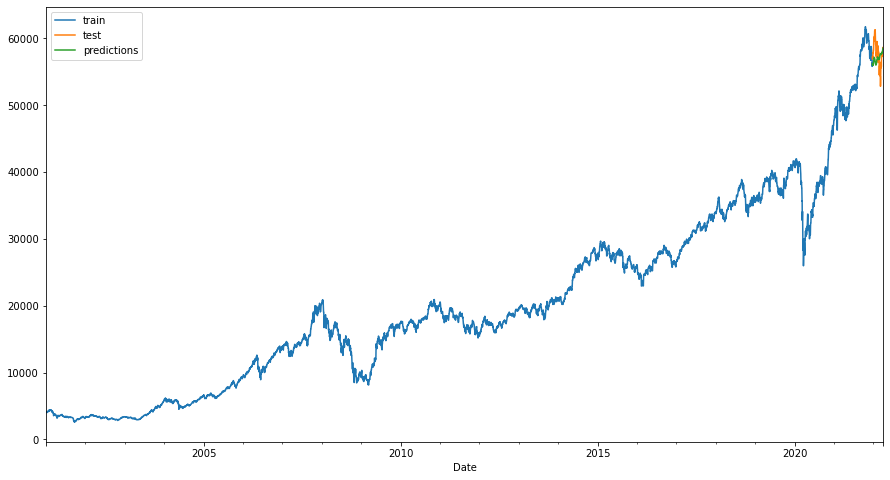

In [297]:
#plotting the test data, train data and the predictions
fig, ax= plt.subplots(figsize= (15, 8))
train.plot(y= 'Close', ax= ax, label= 'train')
test.plot(y= 'Close', ax= ax, label= 'test')
prediction.plot(ax= ax, label= 'predictions')
plt.legend()
plt.show()

## Model Evaluation


The metric we would use to evaluate our models is the root mean squared error. It measures the average distance between values predicted by a model and the actual values. We first have to find the mean squared error and then find the square root.

In [298]:
mse= mean_squared_error(prediction, test)
print('RMSE is {}'.format(np.sqrt(mse)))

RMSE is 2197.122187640928


Root mean squared error is equal to 2197.12. We would use this as a value when comparing other models

## Sentiment Analysis

In [299]:
news_df.tail(10)

,headline_category,headline_text
publish_date,,
2022-03-22,city.nagpur,Should we call RSS leaders janaab for their Mu...
2022-03-23,city.nashik,Pune: Two criminals arrested in Pashan hill ro...
2022-03-24,city.goa,I-League: Churchill Bros edge past Aizawl
2022-03-25,city.goa,In Houston; $5;000 reward for info on John Dia...
2022-03-26,city.kochi,Kerala University gets a balanced budget of Rs...
2022-03-27,city.cuttack,BJD rides Odisha CM Naveen Patnaik magic to sw...
2022-03-28,city.goa,Third straight BJP govt in Goa as Team Sawant ...
2022-03-29,entertainment.kannada.movies.news,Yash at KGF: Chapter 2 launch: The Indian film...
2022-03-30,city.pune,Hotels ask Maharashtra CM Uddhav Thackeray for...


In [300]:
#getting the count of all the headline category
news_df.headline_category.value_counts()

unknown                           1303
city.delhi                         365
india                              314
city.goa                           286
city.mumbai                        284
                                  ... 
entertainment.events.bangalore       1
nagpur-times                         1
entertainment.punjabi.movies         1
history                              1
life-style.health-fitness            1
Name: headline_category, Length: 441, dtype: int64

In [301]:
def cleaning_data(df):
    # function to clean the dataset by changing the text to a lower case and removing punctuations
    token= df.split(',')
    tokens= [w.lower() for w in token]
    punctuations= str.maketrans('', '', string.punctuation)
    strip= [w.translate(punctuations) for w in tokens]
    return ''.join(strip)
    

In [302]:
#applying the function to our data
clean_df= news_df['headline_text'].apply(cleaning_data)

In [303]:
clean_df

publish_date
2001-01-02                                          raju chacha
2001-01-03                                        devdas jinxed
2001-01-04                                          unbreakable
2001-01-05                 mp best in forest development centre
2001-01-06    australia new zealand urged to accept indofiji...
                                    ...                        
2022-03-27    bjd rides odisha cm naveen patnaik magic to sw...
2022-03-28    third straight bjp govt in goa as team sawant ...
2022-03-29    yash at kgf chapter 2 launch the indian film i...
2022-03-30    hotels ask maharashtra cm uddhav thackeray for...
2022-03-31    tamil nadu sees marginal rise of covid cases w...
Name: headline_text, Length: 7717, dtype: object

In [304]:
news_df['clean_text']= clean_df

In [305]:
news_df

,headline_category,headline_text,clean_text
publish_date,,,
2001-01-02,entertainment.hindi.bollywood,Raju Chacha,raju chacha
2001-01-03,entertainment.hindi.bollywood,'Devdas': Jinxed?,devdas jinxed
2001-01-04,entertainment.english.hollywood,Unbreakable,unbreakable
2001-01-05,india,MP best in forest development: Centre,mp best in forest development centre
2001-01-06,unknown,Australia; New Zealand urged to accept Indo-Fi...,australia new zealand urged to accept indofiji...
...,...,...,...
2022-03-27,city.cuttack,BJD rides Odisha CM Naveen Patnaik magic to sw...,bjd rides odisha cm naveen patnaik magic to sw...
2022-03-28,city.goa,Third straight BJP govt in Goa as Team Sawant ...,third straight bjp govt in goa as team sawant ...
2022-03-29,entertainment.kannada.movies.news,Yash at KGF: Chapter 2 launch: The Indian film...,yash at kgf chapter 2 launch the indian film i...


The clean_text column is a cleaner version of the headline text column. As we can see, all alphabets are in lower case and all punctuations have been removed successfully. 

## Text Features Extraction

In this section, we will extract important features like polarity(which is the overall sentiment) with values ranging from -1 to 1, where -1 means negative sentiment and 1 means positive sentiment. Subjectivity(referring to personal opinions and judgement) with values from 0 to 1. Negative, neutral, compound are also extracted

In [306]:
def get_polarity(df):
    return TextBlob(df).polarity

In [307]:
news_df['polarity']= news_df['clean_text'].apply(get_polarity)

In [308]:
news_df

,headline_category,headline_text,clean_text,polarity
publish_date,,,,
2001-01-02,entertainment.hindi.bollywood,Raju Chacha,raju chacha,0.000000
2001-01-03,entertainment.hindi.bollywood,'Devdas': Jinxed?,devdas jinxed,0.000000
2001-01-04,entertainment.english.hollywood,Unbreakable,unbreakable,0.000000
2001-01-05,india,MP best in forest development: Centre,mp best in forest development centre,1.000000
2001-01-06,unknown,Australia; New Zealand urged to accept Indo-Fi...,australia new zealand urged to accept indofiji...,0.136364
...,...,...,...,...
2022-03-27,city.cuttack,BJD rides Odisha CM Naveen Patnaik magic to sw...,bjd rides odisha cm naveen patnaik magic to sw...,0.250000
2022-03-28,city.goa,Third straight BJP govt in Goa as Team Sawant ...,third straight bjp govt in goa as team sawant ...,0.100000
2022-03-29,entertainment.kannada.movies.news,Yash at KGF: Chapter 2 launch: The Indian film...,yash at kgf chapter 2 launch the indian film i...,0.000000


In [309]:
def get_subjectivity(df):
    return TextBlob(df).subjectivity

In [310]:
news_df['subjectivity']= news_df['clean_text'].apply(get_subjectivity)

In [311]:
news_df

,headline_category,headline_text,clean_text,polarity,subjectivity
publish_date,,,,,
2001-01-02,entertainment.hindi.bollywood,Raju Chacha,raju chacha,0.000000,0.000000
2001-01-03,entertainment.hindi.bollywood,'Devdas': Jinxed?,devdas jinxed,0.000000,0.000000
2001-01-04,entertainment.english.hollywood,Unbreakable,unbreakable,0.000000,0.000000
2001-01-05,india,MP best in forest development: Centre,mp best in forest development centre,1.000000,0.300000
2001-01-06,unknown,Australia; New Zealand urged to accept Indo-Fi...,australia new zealand urged to accept indofiji...,0.136364,0.454545
...,...,...,...,...,...
2022-03-27,city.cuttack,BJD rides Odisha CM Naveen Patnaik magic to sw...,bjd rides odisha cm naveen patnaik magic to sw...,0.250000,0.500000
2022-03-28,city.goa,Third straight BJP govt in Goa as Team Sawant ...,third straight bjp govt in goa as team sawant ...,0.100000,0.200000
2022-03-29,entertainment.kannada.movies.news,Yash at KGF: Chapter 2 launch: The Indian film...,yash at kgf chapter 2 launch the indian film i...,0.000000,0.600000


In [312]:
sia= SentimentIntensityAnalyzer()
news_df['negative']= [sia.polarity_scores(v)['neg'] for v in news_df['clean_text']]
news_df['compound']= [sia.polarity_scores(v)['compound'] for v in news_df['clean_text']]
news_df['neutral']= [sia.polarity_scores(v)['neu'] for v in news_df['clean_text']]
news_df['positive']= [sia.polarity_scores(v)['pos'] for v in news_df['clean_text']]

In [313]:
news_df

,headline_category,headline_text,clean_text,polarity,subjectivity,negative,compound,neutral,positive
publish_date,,,,,,,,,
2001-01-02,entertainment.hindi.bollywood,Raju Chacha,raju chacha,0.000000,0.000000,0.000,0.0000,1.000,0.000
2001-01-03,entertainment.hindi.bollywood,'Devdas': Jinxed?,devdas jinxed,0.000000,0.000000,0.000,0.0000,1.000,0.000
2001-01-04,entertainment.english.hollywood,Unbreakable,unbreakable,0.000000,0.000000,0.000,0.0000,1.000,0.000
2001-01-05,india,MP best in forest development: Centre,mp best in forest development centre,1.000000,0.300000,0.000,0.6369,0.543,0.457
2001-01-06,unknown,Australia; New Zealand urged to accept Indo-Fi...,australia new zealand urged to accept indofiji...,0.136364,0.454545,0.000,0.3818,0.729,0.271
...,...,...,...,...,...,...,...,...,...
2022-03-27,city.cuttack,BJD rides Odisha CM Naveen Patnaik magic to sw...,bjd rides odisha cm naveen patnaik magic to sw...,0.250000,0.500000,0.000,0.0000,1.000,0.000
2022-03-28,city.goa,Third straight BJP govt in Goa as Team Sawant ...,third straight bjp govt in goa as team sawant ...,0.100000,0.200000,0.000,0.2263,0.840,0.160
2022-03-29,entertainment.kannada.movies.news,Yash at KGF: Chapter 2 launch: The Indian film...,yash at kgf chapter 2 launch the indian film i...,0.000000,0.600000,0.115,-0.2960,0.885,0.000


These derived features will now be used as predictors.

In [314]:
text_features= news_df[['polarity',
       'subjectivity', 'negative', 'compound', 'neutral', 'positive']]

In [315]:
#merging both news and bsens dataset on their respective dates columns
merge_df= bsens_df.merge(text_features, how= 'inner', left_on= bsens_df.index, right_on= text_features.index)

In [316]:
merge_df.head(5)

,key_0,Close,polarity,subjectivity,negative,compound,neutral,positive
0,2001-01-02,4018.879883,0.000000,0.000000,0.0,0.0000,1.000,0.000
1,2001-01-03,4060.020020,0.000000,0.000000,0.0,0.0000,1.000,0.000
2,2001-01-04,4115.370117,0.000000,0.000000,0.0,0.0000,1.000,0.000
3,2001-01-05,4183.729980,1.000000,0.300000,0.0,0.6369,0.543,0.457
4,2001-01-06,4183.729980,0.136364,0.454545,0.0,0.3818,0.729,0.271


During merging, the date column was renamed as key_0 since each singular dataset(news_df and bsens) both had different names for their date columns. We will rename it and set it as our index.

In [317]:
merge_df.rename({'key_0': 'date'}, axis = 1, inplace= True)
merge_df.set_index('date', inplace= True)

In [318]:
merge_df.head(5)

,Close,polarity,subjectivity,negative,compound,neutral,positive
date,,,,,,,
2001-01-02,4018.879883,0.000000,0.000000,0.0,0.0000,1.000,0.000
2001-01-03,4060.020020,0.000000,0.000000,0.0,0.0000,1.000,0.000
2001-01-04,4115.370117,0.000000,0.000000,0.0,0.0000,1.000,0.000
2001-01-05,4183.729980,1.000000,0.300000,0.0,0.6369,0.543,0.457
2001-01-06,4183.729980,0.136364,0.454545,0.0,0.3818,0.729,0.271


## Model 1: Random forest using only extracted text features

In [319]:
# dividing the data into independent and dependent variables
x= merge_df.drop('Close', axis= 1)
y= merge_df['Close']

In [320]:
#splitting our data...
x_train = x.iloc[: -100]
x_test= x.iloc[-100: ]
y_train = y.iloc[: -100]
y_test = y.iloc[-100 : ]

In [321]:
#Instantiating and training our model
rf= RandomForestRegressor(random_state= 105)
rf.fit(x_train, y_train)
print('Training completed')

Training completed


In [322]:
# making predictions...
pred= rf.predict(x_test)
predictions= pd.DataFrame(pred, index = y_test.index)
predictions


,0
date,
2021-12-22,21177.365067
2021-12-23,19107.760026
2021-12-24,19107.760026
2021-12-25,31947.629287
2021-12-26,19107.760026
...,...
2022-03-27,29731.299327
2022-03-28,33278.837963
2022-03-29,42720.184160


In [323]:
predictions.rename({0: 'predictions'}, axis= 1, inplace= True)

In [324]:
predictions.head(5)

,predictions
date,
2021-12-22,21177.365067
2021-12-23,19107.760026
2021-12-24,19107.760026
2021-12-25,31947.629287
2021-12-26,19107.760026


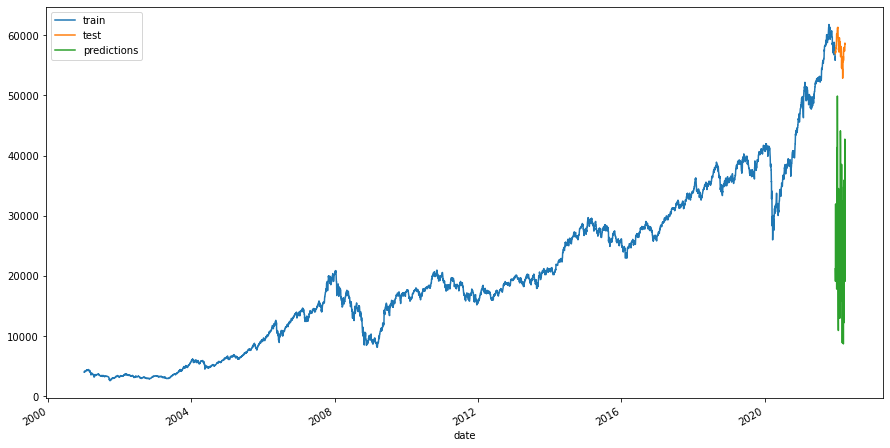

In [325]:
#plotting the test data, train data and the predictions
fig, ax= plt.subplots(figsize= (15, 8))
y_train.plot(ax= ax, label= 'train')
y_test.plot(ax= ax, label= 'test')
predictions.plot(ax= ax, label= 'predictions')
plt.legend()
plt.show()

In [326]:
mse= mean_squared_error(predictions, y_test)
print('RMSE is {}'.format(np.sqrt(mse)))

RMSE is 34932.10234008191


The root mean square error is 34,932.1. This shows that model 1 performed more worse than the baseline model 

## Time series Feature Engineering





The date, month, quarter will be extracted from our time series dataset. A column to signify whether a particular day was a weekend or not is also added. Columns representing moving average and moving variance is also represented. The moving window is 7 days. This will aid in the modelling process.

In [327]:
merge_df['day']= merge_df.index.day
merge_df['month']= merge_df.index.month
merge_df['quarter']= merge_df.index.day
merge_df['is_weekend'] = 0
merge_df.loc[merge_df['day'].isin([5,6]), 'is_weekend'] = 1
for i in range(1, 8):
    # Moving average and moving variance
    merge_df['MA_{}'.format(i)]= merge_df.Close.rolling(i).mean()
    merge_df['MAV_{}'.format(i)]= merge_df.Close.rolling(i).var()

    

In [328]:
merge_df

,Close,polarity,subjectivity,negative,compound,neutral,positive,day,month,quarter,...,MA_3,MAV_3,MA_4,MAV_4,MA_5,MAV_5,MA_6,MAV_6,MA_7,MAV_7
date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,4018.879883,0.000000,0.000000,0.000,0.0000,1.000,0.000,2,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,4060.020020,0.000000,0.000000,0.000,0.0000,1.000,0.000,3,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-04,4115.370117,0.000000,0.000000,0.000,0.0000,1.000,0.000,4,1,4,...,4064.756673,2.344418e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-05,4183.729980,1.000000,0.300000,0.000,0.6369,0.543,0.457,5,1,5,...,4119.706706,3.840143e+03,4094.500000,5101.607461,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-06,4183.729980,0.136364,0.454545,0.000,0.3818,0.729,0.271,6,1,6,...,4160.943359,1.557690e+03,4135.712524,3584.840333,4112.345996,5418.603479,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-27,57362.199219,0.250000,0.500000,0.000,0.0000,1.000,0.000,27,3,27,...,57362.199219,9.442665e-07,57420.569336,13628.282322,57473.419531,24186.927464,57559.399740,63705.119314,57521.269531,63264.988945
2022-03-28,57593.488281,0.100000,0.200000,0.000,0.2263,0.840,0.160,28,3,28,...,57439.295573,1.783154e+04,57420.021484,13373.657608,57455.153125,16201.404070,57493.430990,21752.292752,57564.269531,53253.603528
2022-03-29,57943.648438,0.000000,0.600000,0.115,-0.2960,0.885,0.000,29,3,29,...,57633.111979,8.569833e+04,57565.383789,75480.648655,57524.746875,64867.280413,57536.569010,52732.401639,57557.747768,47083.446402


In [329]:
merge_df.isna().sum()

Close              0
polarity           0
subjectivity       0
negative           0
compound           0
neutral            0
positive           0
day                0
month              0
quarter            0
is_weekend         0
MA_1               0
MAV_1           7717
MA_2               1
MAV_2              1
MA_3               2
MAV_3              2
MA_4               3
MAV_4              3
MA_5               4
MAV_5              4
MA_6               5
MAV_6              5
MA_7               6
MAV_7              6
dtype: int64

In [330]:
merge_df.drop('MAV_1', axis= 1, inplace= True)


In [331]:
merge_df.dropna(inplace= True)

## Model 2: Lasso regression using extracted text features and time series features.

In [332]:
x= merge_df.drop('Close', axis= 1)
y= merge_df['Close']

In [333]:
x_train1 = x.iloc[: -100]
x_test1= x.iloc[-100: ]
y_train1 = y.iloc[: -100]
y_test1 = y.iloc[-100 : ]

In [334]:
# Instantiating and training the model
lasso= Lasso(random_state= 105)
lasso.fit(x_train1, y_train1)
print('Training completed')

Training completed


In [335]:
#making predictions
pred1= lasso.predict(x_test1)
predictions1= pd.DataFrame(pred1, index = y_test1.index)
predictions1


,0
date,
2021-12-22,56929.704475
2021-12-23,57314.068186
2021-12-24,57124.994121
2021-12-25,57124.691517
2021-12-26,57124.313091
...,...
2022-03-27,57362.271919
2022-03-28,57593.574114
2022-03-29,57943.483403


In [336]:
predictions1.rename({0: 'predictions'}, axis= 1, inplace= True)

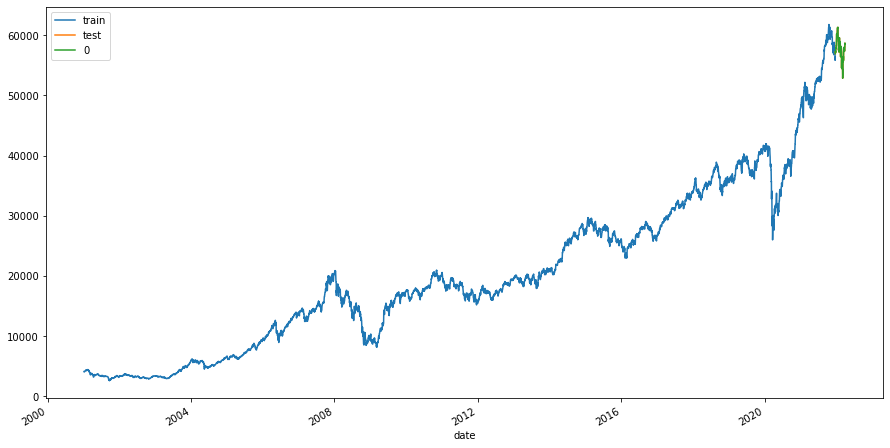

In [337]:
fig, ax= plt.subplots(figsize= (15, 8))
y_train1.plot(ax= ax, label= 'train')
y_test1.plot(ax= ax, label= 'test')
predictions1.plot(ax= ax, label= 'predictions')
plt.legend()
plt.show()

In [338]:
mse= mean_squared_error(predictions1, test.Close)
print('RMSE is {}'.format(np.sqrt(mse)))

RMSE is 2.0719295120980066


The root mean square error of model 2 is 2.07. It performs way better than all the models so far i.e the baseline model and model 1. 

## Model 3: Auto regression using both text and time series features.

In [339]:
# setting the frequency to a daily one
merge_df= merge_df.asfreq('D', method= 'ffill')

In [340]:
# creating training and test sets
train= merge_df[:-100]
test= merge_df[-100:]

In [341]:
# instantiating and training the model, using values from the past 28 days as lag variables and extracted text and time series features
lass_ar= Lasso(random_state= 105)
forecaster= ForecasterAutoreg(regressor= lass_ar, lags= 28)
forecaster.fit(y= train['Close'], exog= train.drop(['Close'], axis= 1))

In [342]:
forecaster

ForecasterAutoreg 
Regressor: Lasso(random_state=105) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28] 
Transformer for y: None 
Transformer for exog: None 
Window size: 28 
Weight function included: False 
Exogenous included: True 
Type of exogenous variable: <class 'pandas.core.frame.DataFrame'> 
Exogenous variables names: ['polarity', 'subjectivity', 'negative', 'compound', 'neutral', 'positive', 'day', 'month', 'quarter', 'is_weekend', 'MA_1', 'MA_2', 'MAV_2', 'MA_3', 'MAV_3', 'MA_4', 'MAV_4', 'MA_5', 'MAV_5', 'MA_6', 'MAV_6', 'MA_7', 'MAV_7'] 
Training range: [Timestamp('2001-01-08 00:00:00'), Timestamp('2021-12-21 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': 'deprecated', 'positive': False, 'precompute': False, 'random_state': 105, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False} 
Creatio

In [343]:
# making predictions...
prediction= forecaster.predict(len(test), exog= test.drop(['Close'], axis= 1))
prediction

2021-12-22    56407.904983
2021-12-23    56548.889835
2021-12-24    56550.442773
2021-12-25    56644.168363
2021-12-26    56684.469860
                  ...     
2022-03-27    56695.833024
2022-03-28    56759.279490
2022-03-29    56865.430490
2022-03-30    57005.541245
2022-03-31    57116.625504
Freq: D, Name: pred, Length: 100, dtype: float64

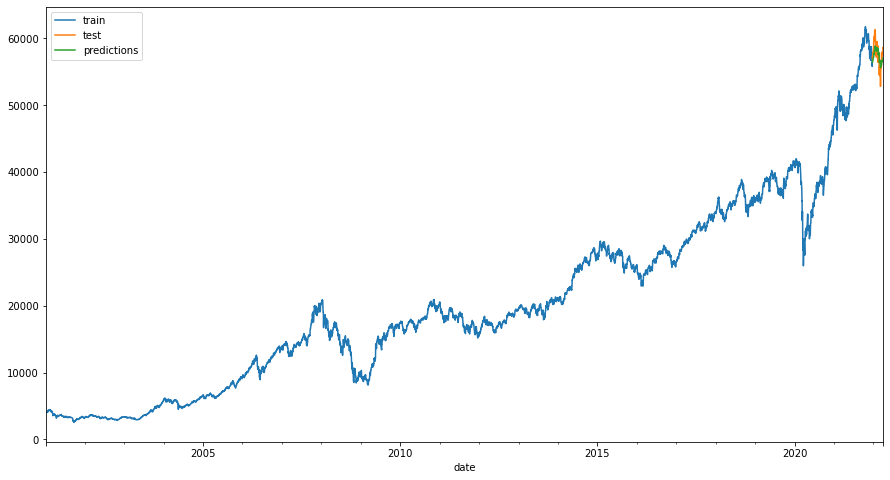

In [344]:
fig, ax= plt.subplots(figsize= (15, 8))
train.plot(y='Close', ax= ax, label= 'train')
test.plot(y= 'Close', ax= ax, label= 'test')
prediction.plot(ax= ax, label= 'predictions')
plt.legend()
plt.show()

In [345]:
mse= mean_squared_error(prediction, test['Close'])
print('RMSE is {}'.format(np.sqrt(mse)))

RMSE is 1276.2027555937643


The root mean squared error is 1276.20. This model doesnt perform as much as model 2.  

## Final Model: Model 2


## RMSE: 2.07